In [11]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy import interpolate

In [12]:
def f(x):
    x_points = df['seconds']
    y_points = df['FHR']

    tck = interpolate.splrep(x_points, y_points)
    return interpolate.splev(x, tck)

def interpolate_df(df, col):
    t = 50
    values = list(df[col])
    flag = None
    for i in range(len(df)-t):
        x = df[col][i]
        if x>=50:
            pass
        else:
            count = 0
            while True:
                if df[col][i+count]==0:
                    count +=1
                else:
                    flag = 'yes'
                    break
                if count==t+1:
                    flag = 'no'
                    break
            if flag == 'yes':
                values[i] = f(x)
    df[col+'_denoised'] = values
    return df

def plot_interpolated_df(df,col):
    fig, axs = plt.subplots(2,1, figsize=(25,12))
    plt.sca(axs[0])
    plt.plot(df['seconds'], df[col], label='Noisy')
    plt.legend()

    plt.sca(axs[1])
    plt.plot(df.seconds, df[col+'_denoised'], label='DeNoised')
    plt.legend()

    plt.show()

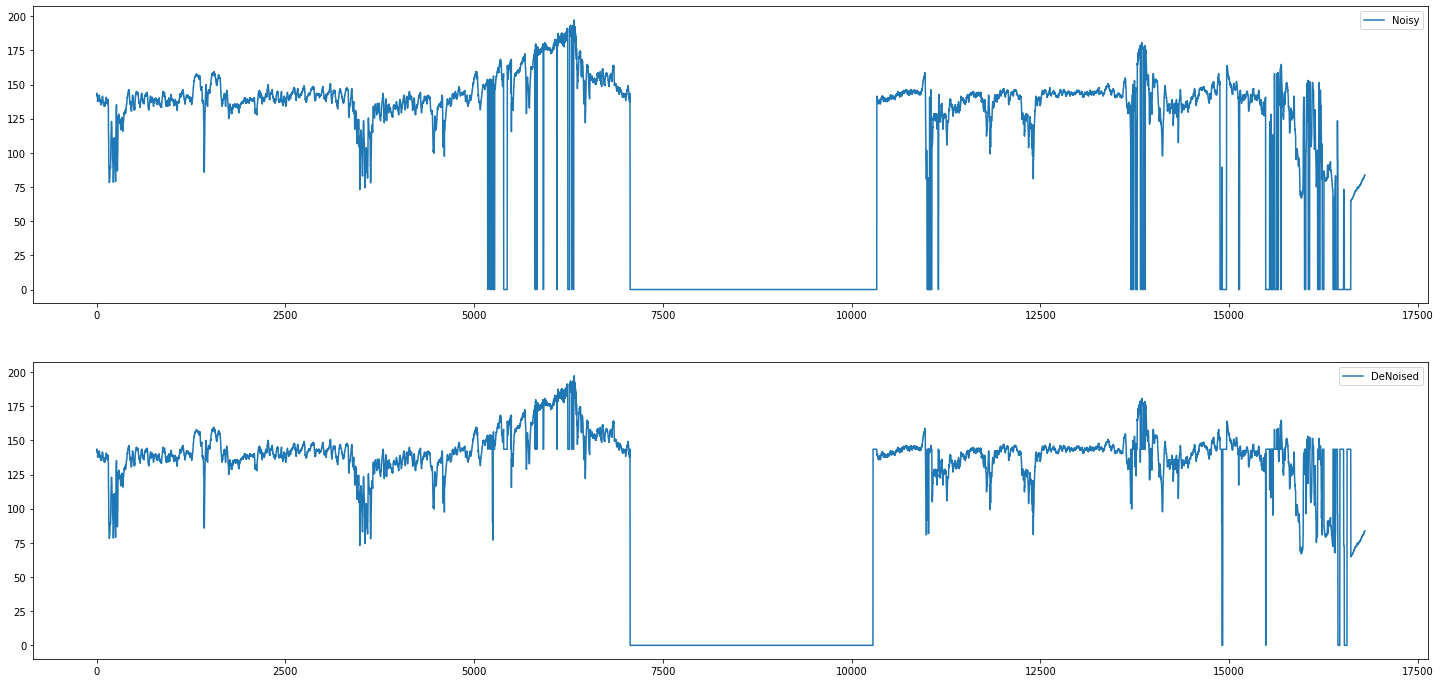

In [13]:
df = pd.read_csv(r'database\signals\1006.csv')
df = interpolate_df(df, col='FHR')
plot_interpolated_df(df, col='FHR')

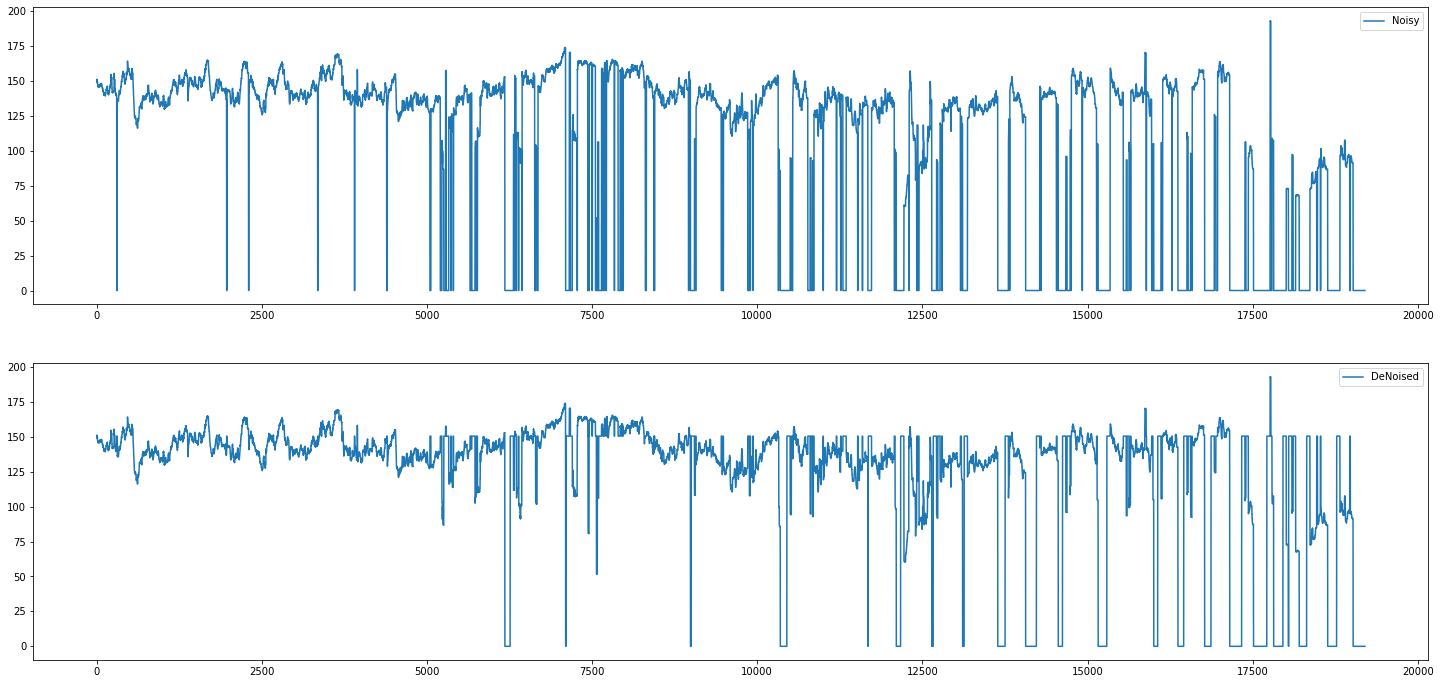

In [14]:
df = pd.read_csv(r'database\signals\1001.csv')
df = interpolate_df(df, col='FHR')
plot_interpolated_df(df, col='FHR')

In [19]:
root = 'database/signals/'
files = os.listdir(root)
for count, f_name in enumerate(files):
    path = root + f_name
    df = pd.read_csv(path)
    df = interpolate_df(df, 'FHR')
    patiend_id = f_name.split('.')[0]
    df.to_csv(f'database-interpolated/{patiend_id}.csv', index=False)
    print(f'Saved {f_name}, done{count+1}', end='\r')

TypeError: can only concatenate list (not "str") to list